In [38]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# ANIMALS
ANIMAL_IDS = ["R010", "R011", "R012"]

# DATES
date_min, date_max = dju.return_date_window(latest_date="2023-11-5", n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [40]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-11-06 07:21:01,147][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 21 sessions for R010 between 2023-10-16 and 2023-11-05
fetched 21 sessions for R011 between 2023-10-16 and 2023-11-05
Not all variables are the same length. Cannot create proper DataFrame
result: 193
hits: 193
violations: 193
temperror: 193
hit_rate: 192
error_rate: 192
violation_rate: 192
temp_error_rate: 192
n_lpokes: 192
n_cpokes: 192
n_rpokes: 192
trial_dur: 192
trial_start: 192
valid_early_spoke: 192
first_spoke: 192
first_lpoke: 192
first_rpoke: 192
n_settling_ins: 192
avg_settling_in: 192
cpoke_dur: 192
stage: 192
curriculum: 192
sides: 193
SMA_set: 192
is_match: 193
sa: 192
sb: 192
stimuli_on: 192
settling_in_dur: 192
legal_cbreak_dur: 192
pre_dur: 192
adj_pre_dur: 192
stimulus_dur: 192
delay_dur: 192
post_dur: 192
sb_extra_dur: 192
viol_off_dur: 192
pre_go_dur: 192
inter_trial_dur: 192
go_type: 192
go_dur: 192
give_type_set: 192
give_type_imp: 192
give_frac: 192
give_delay_dur: 192
give_xtra_light_delay_dur: 192
give_use: 193
replay_on: 192
timeouts: 193
water_delivere

In [41]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R012-_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2023-10-16 -> 2023-11-05
Returning appended df with entries between 2023-10-16 and 2023-11-05
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\R012-_days_df.csv


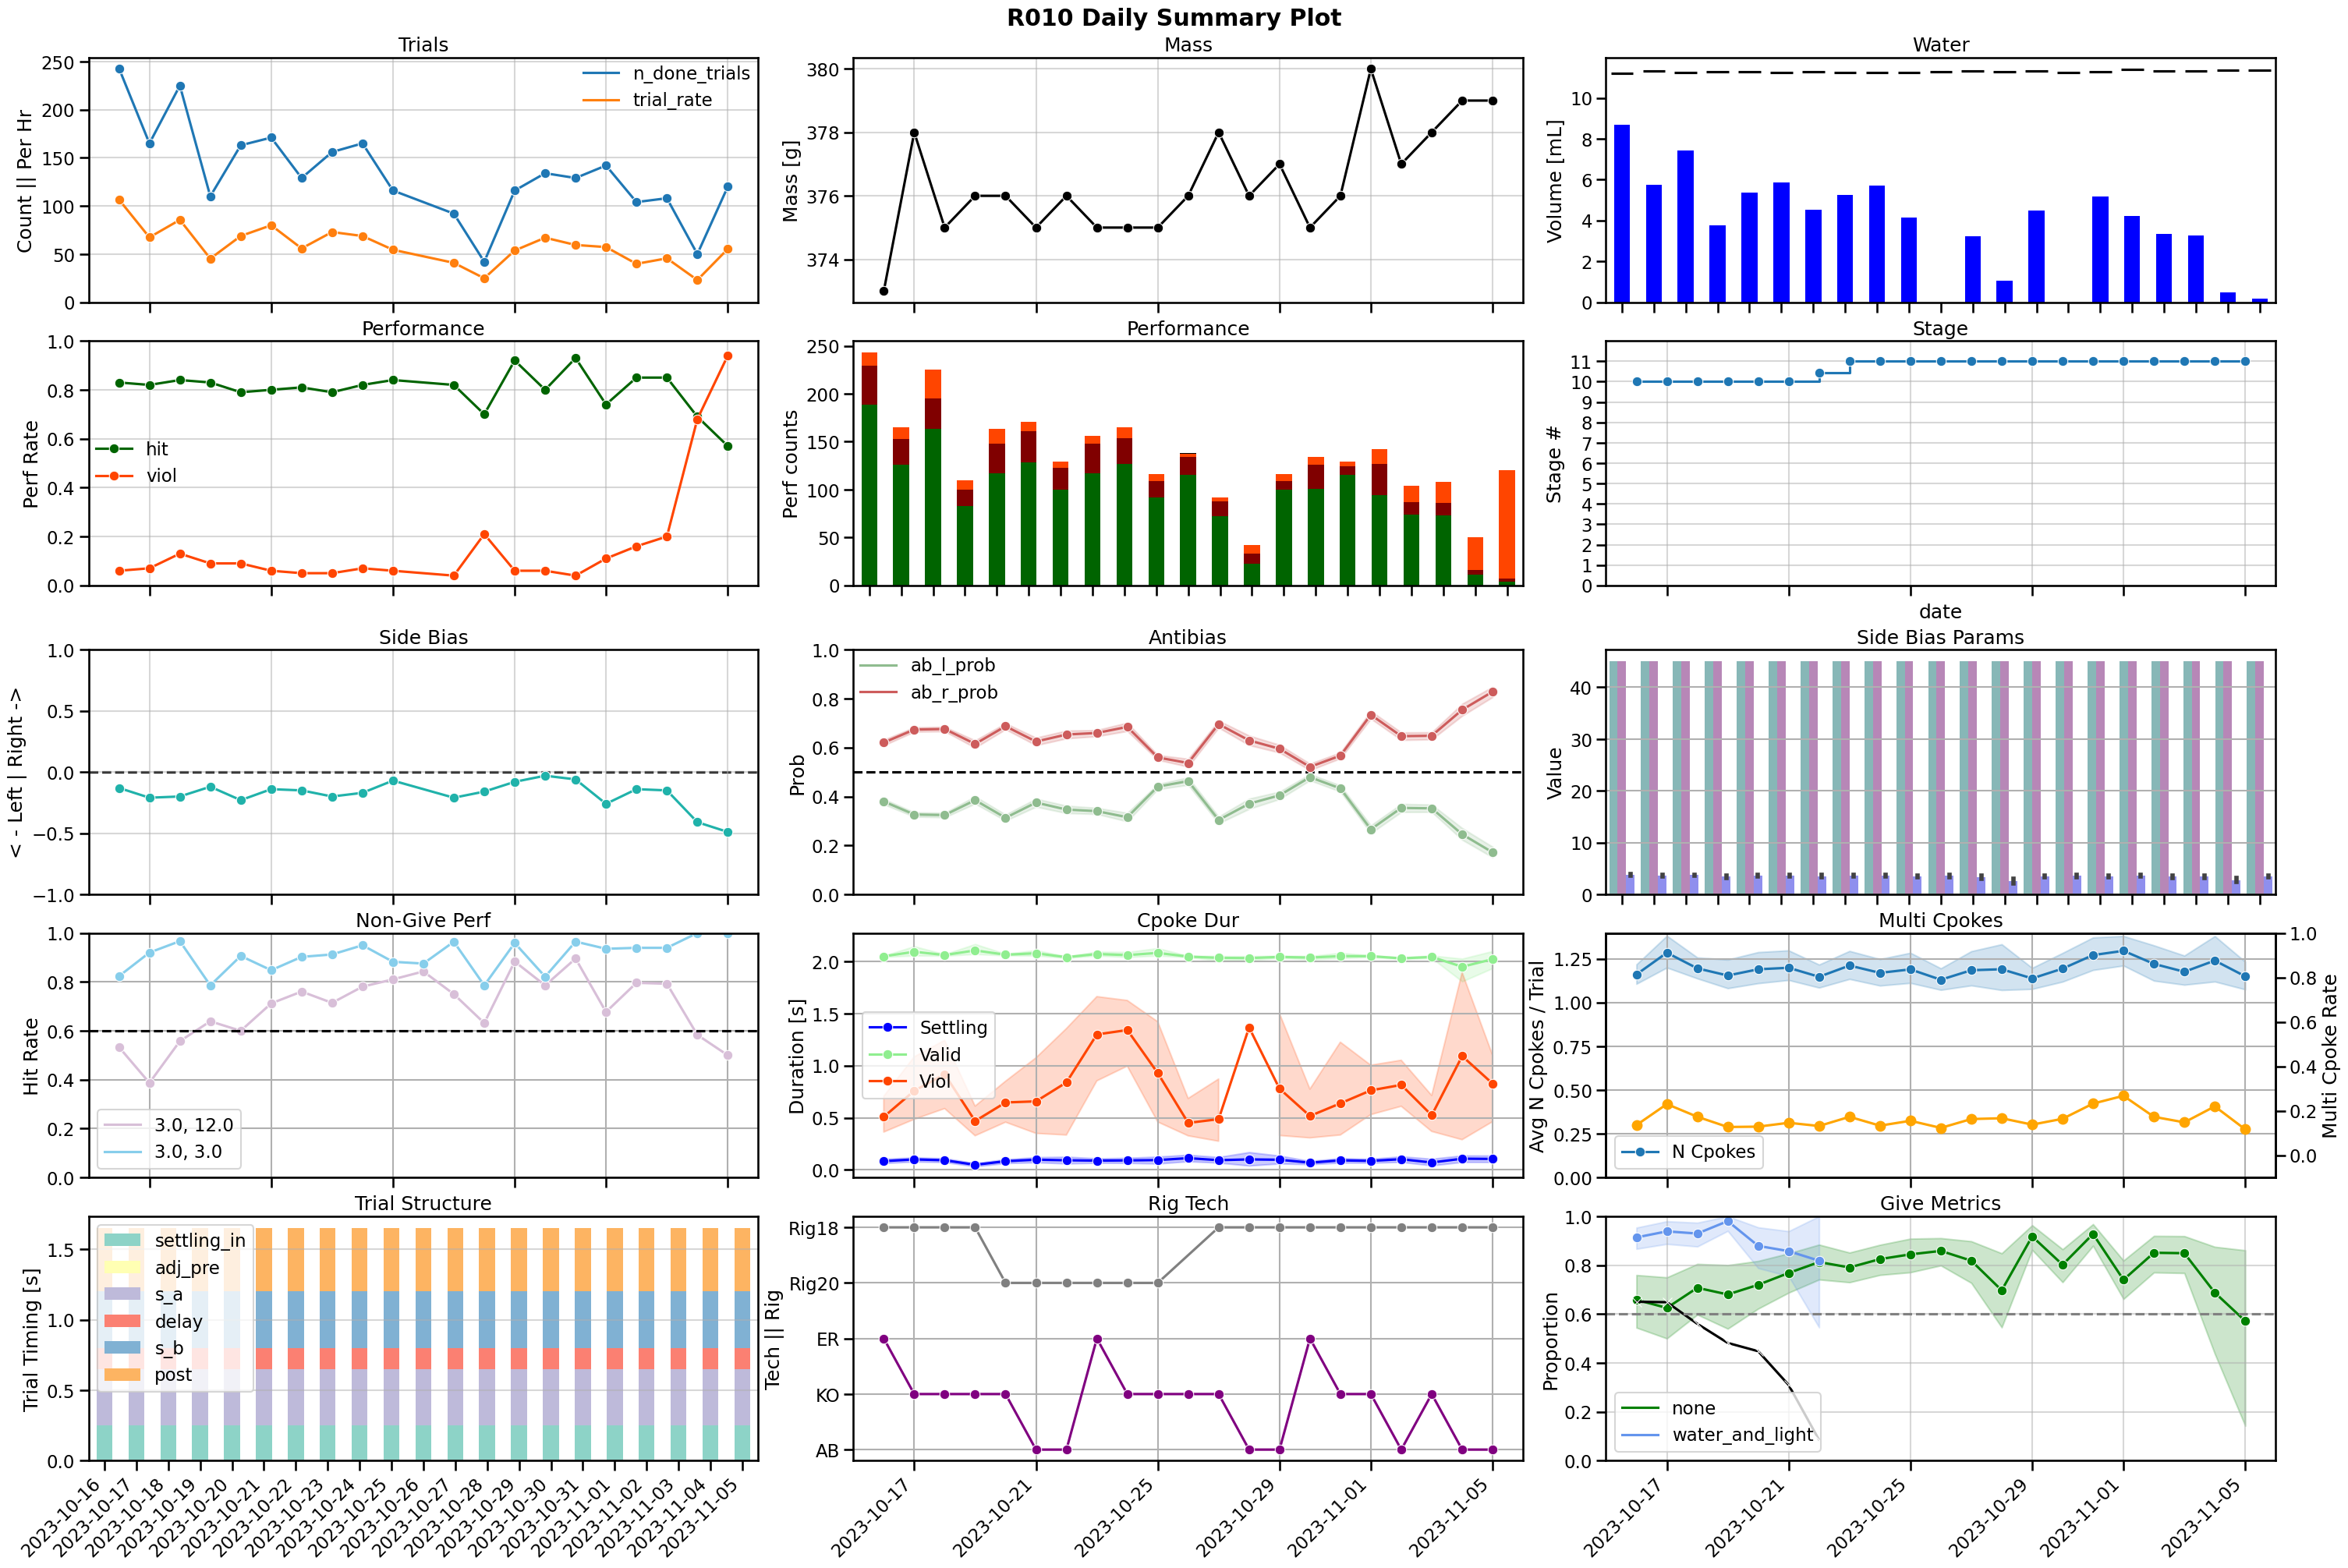

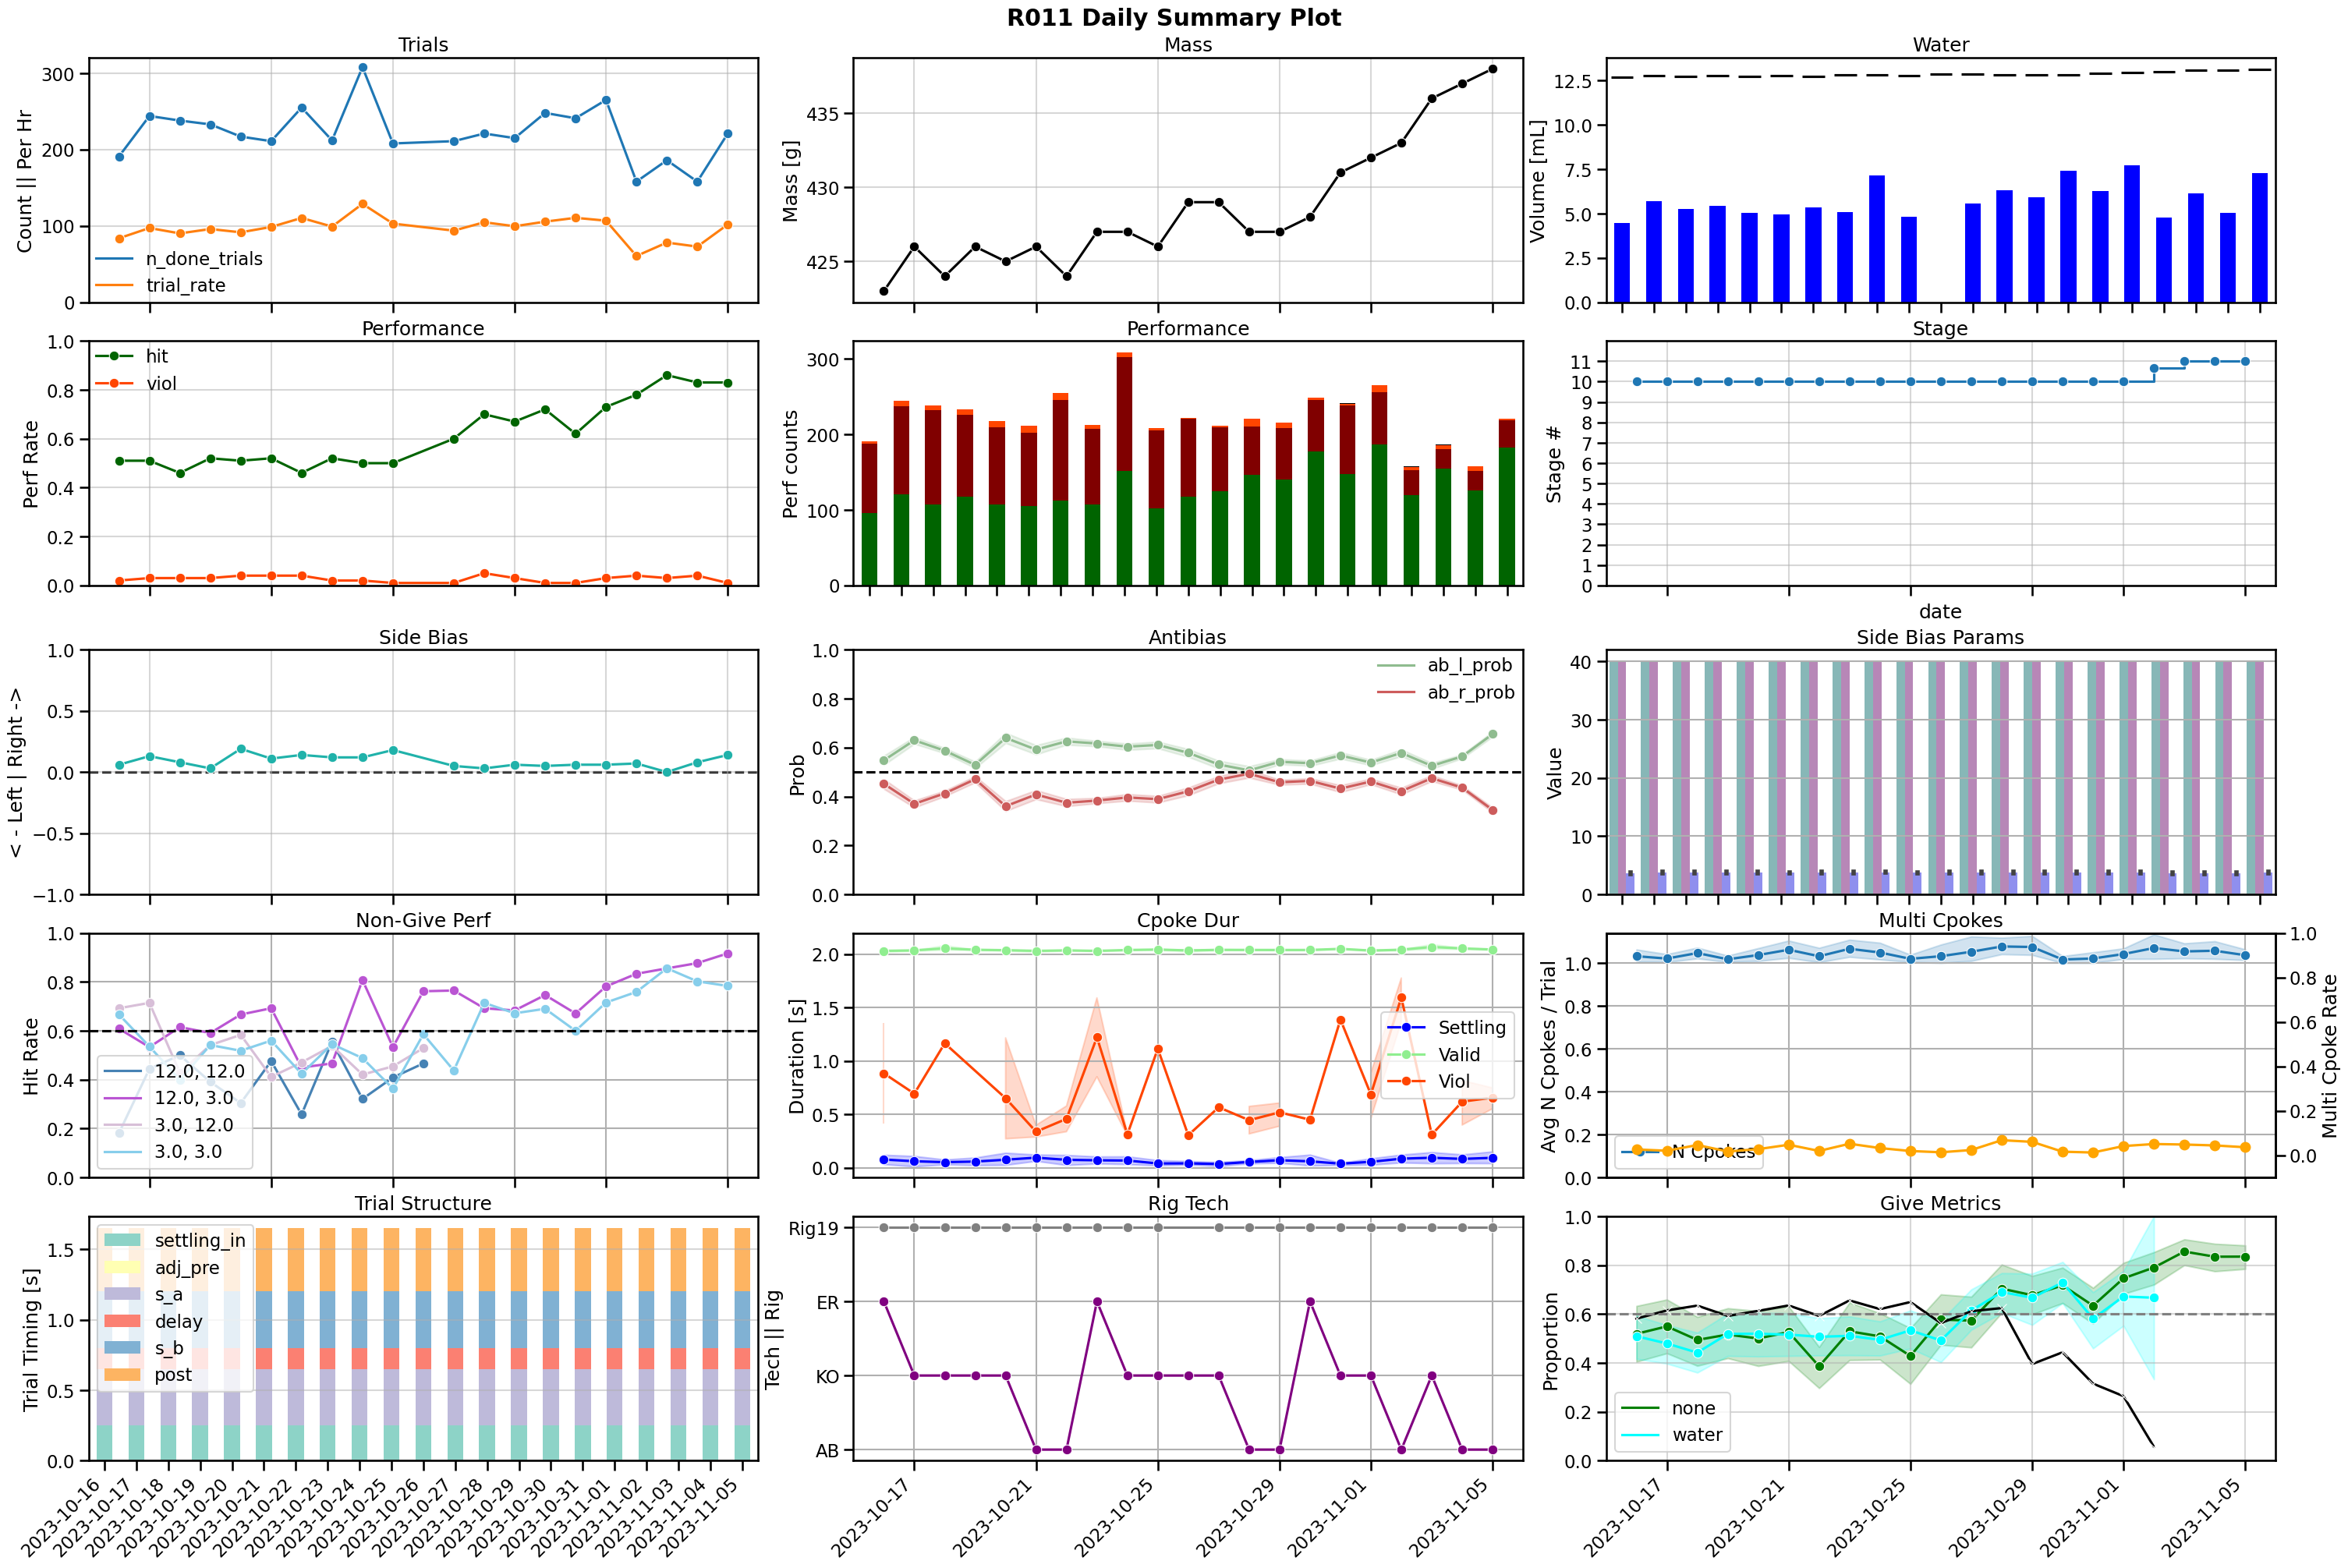

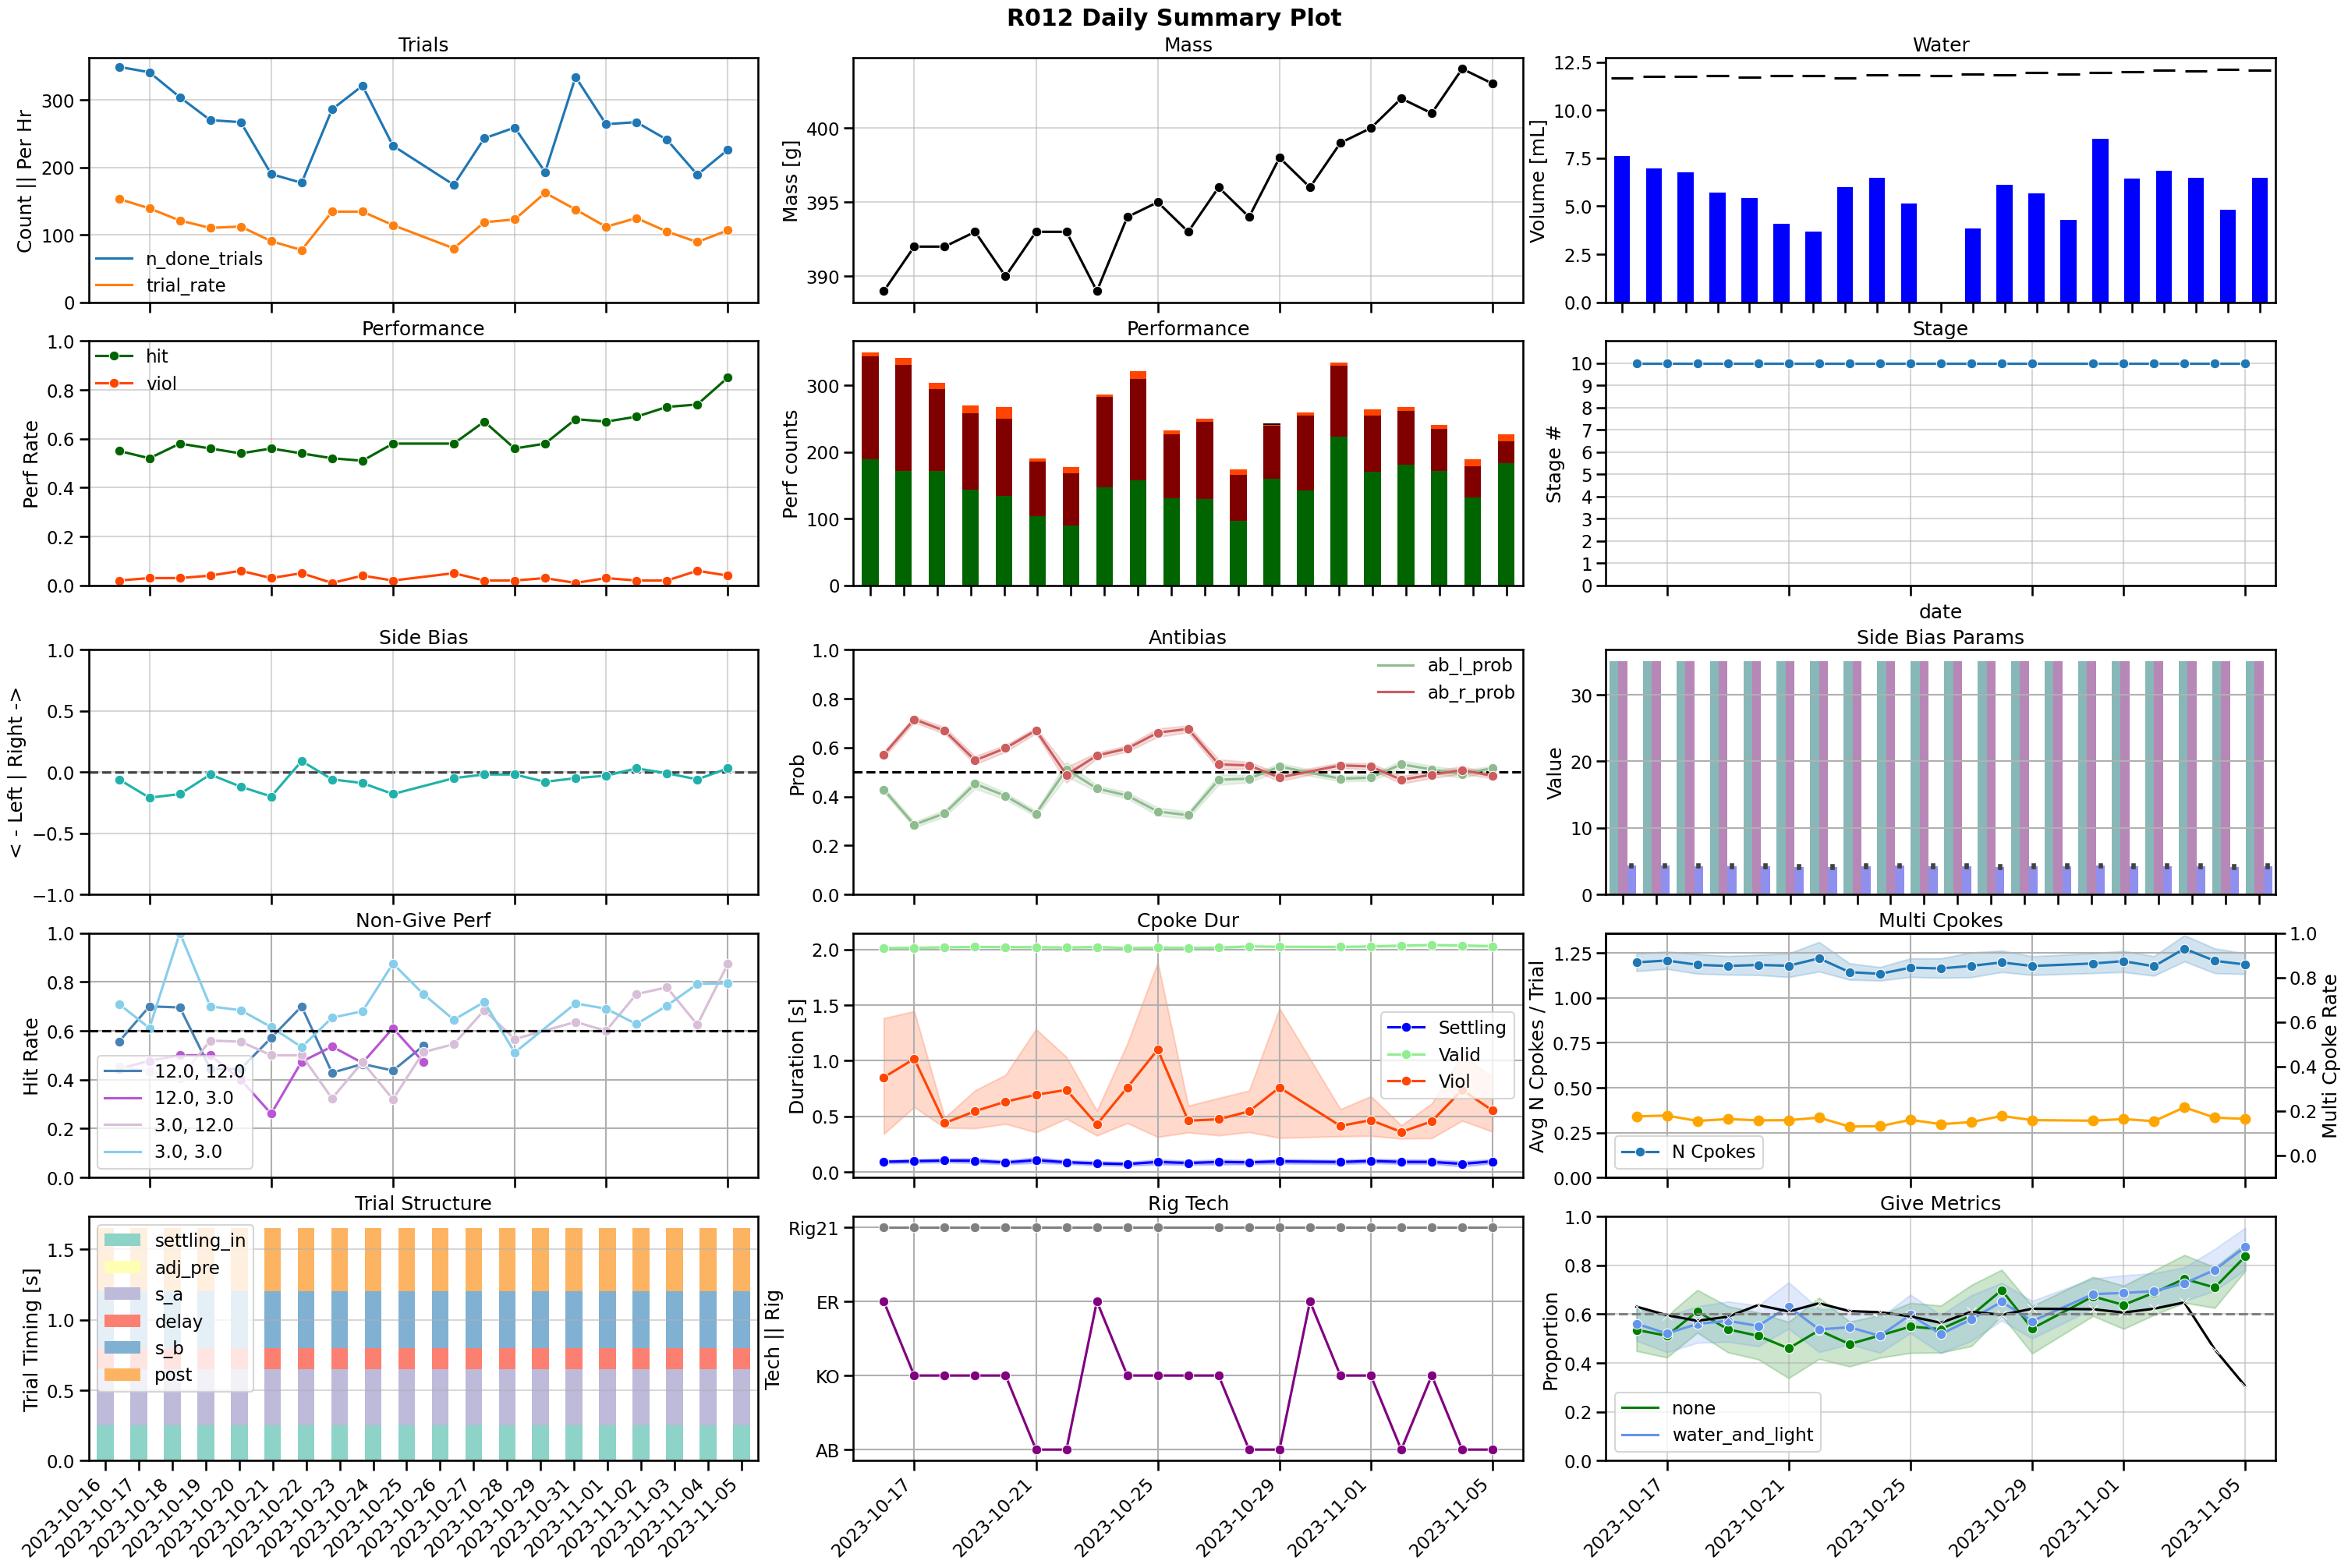

In [42]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [43]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R010_2023-11-05_day_summary
['s_a', 's_b']
making R011_2023-11-05_day_summary
['s_a', 'delay']
making R012_2023-11-05_day_summary
['s_a', 'go']
